# Introduction
In this notebook, I will be analyzing 'Google Job Skills' dataset. Firstly I will be analyzing which programming language is popular for Google Jobs.

# Table of contents¶




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
from collections import defaultdict
# regualar expression
import re

# Loding data

In [3]:
#loding the data using .read_csv
data=pd.read_csv('job_skills.csv')

In [4]:
# print the top 5 row from the dataframe
data.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


# Which languages are asked most in Google Jobs requirement?

In [5]:
# most popular language list
programming_language_list=['python','java','c++','javascript','objective-c','ruby','perl','c','c#'
                           ,'sql','kotlin']


In [6]:

#get our minimum qualification column and convert all value into list
minimum_qualifications=data['Minimum Qualifications'].tolist()

#lets join our list to single string and lower case latter
minimum_qualifications_string="".join(str(v) for v in minimum_qualifications).lower()

In [7]:
#find which language occure  most in minimum qualification string 
wordcount=dict((x,0) for x in programming_language_list)

for w in re.findall(r"[\w'+#-]+|[.!?;’]",minimum_qualifications_string):
    if w in programming_language_list:
        wordcount[w]+=1
        
print(wordcount)
        

{'python': 97, 'java': 76, 'c++': 54, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'kotlin': 3}


In [8]:
#sort dict
programming_language_popularity=sorted(wordcount.items(),key=lambda kv:kv[1],reverse=True)

In [9]:
#make new data frame for easy use
popular_prog_lang=pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
popular_prog_lang['Language']=popular_prog_lang.Language.str.capitalize()
popular_prog_lang=popular_prog_lang[::-1]

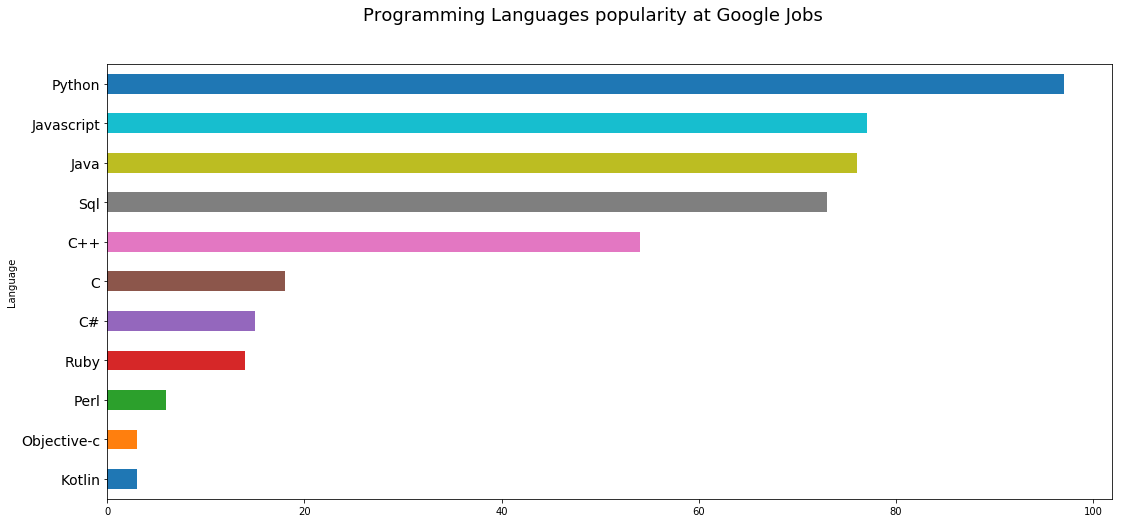

In [10]:
#plot
popular_prog_lang.plot.barh(x='Language',y='Popularity',figsize=(18,8),legend=False)
# add a suptitle
plt.suptitle("Programming Languages popularity at Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

python language is most popular language for google job

# Which degrees are most popular at Google Jobs?

In [11]:
minimum_qualifications=data['Minimum Qualifications'].tolist()


minimum_qualifications_string="".join(str(v) for v in minimum_qualifications)
degree_list=["BA","BS","Bachelor's","PhD"]

In [12]:
wordcount=dict((x,0) for x in degree_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]",minimum_qualifications_string):
    if w in degree_list:
        wordcount[w]+=1
print(wordcount)

{'BA': 800, 'BS': 877, "Bachelor's": 147, 'PhD': 8}


In [13]:
#sort dict
degree_popularity=sorted(wordcount.items(),key=lambda kv:kv[1],reverse=True)

deg_popularity=pd.DataFrame(degree_popularity,columns=['Degree','Popularity'])



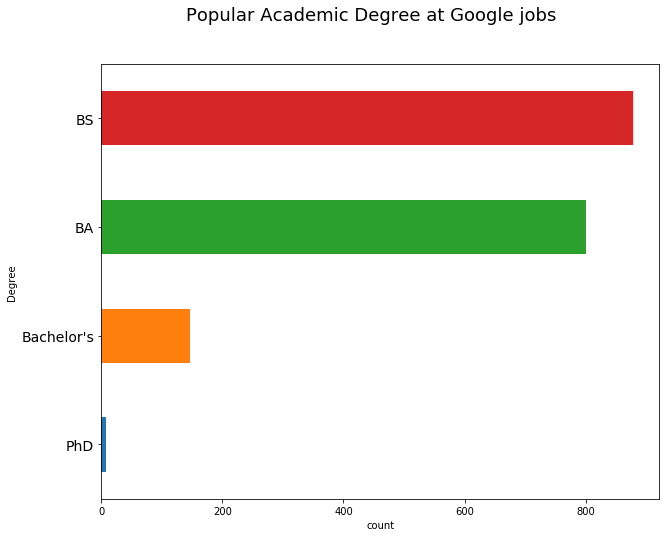

In [14]:
deg_popularity=deg_popularity[::-1]

deg_popularity.plot.barh(x='Degree',y='Popularity',figsize=(10,8),legend=False)

plt.suptitle("Popular Academic Degree at Google jobs",fontsize=18)

plt.xlabel("count")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

BA and BS Degree is most popular

# How many years of experiences are needed for Google Jobs?


In [15]:
years_exp=defaultdict(lambda:0)
for w in re.findall(r'([0-9]+) year',minimum_qualifications_string):
    years_exp[w]+=1
    
print(years_exp)

defaultdict(<function <lambda> at 0x0000013CA1B96840>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


In [16]:
#sort the 
years_exp = sorted(years_exp.items(),key=lambda kv:kv[1], reverse=True)

df_years_exp = pd.DataFrame(years_exp,columns=['Years of Experience','Popularity'])

df_years_exp=df_years_exp[::-1]

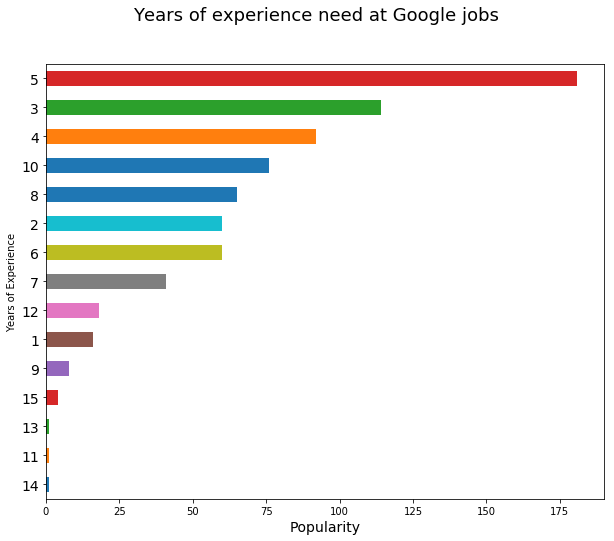

In [17]:
df_years_exp.plot.barh(x='Years of Experience',y='Popularity',figsize=(10,8),legend=False)

plt.suptitle("Years of experience need at Google jobs",fontsize=18)

plt.xlabel("Popularity", fontsize=14)
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()



five experience is most popular for google jobs

#  Let's find out which job category Google wants more experiences

In [18]:

data['Experience'] = data['Minimum Qualifications'].str.extract(r'([0-9]+) year')

In [19]:

dff = data[['Experience','Category']]
dff = dff.dropna()

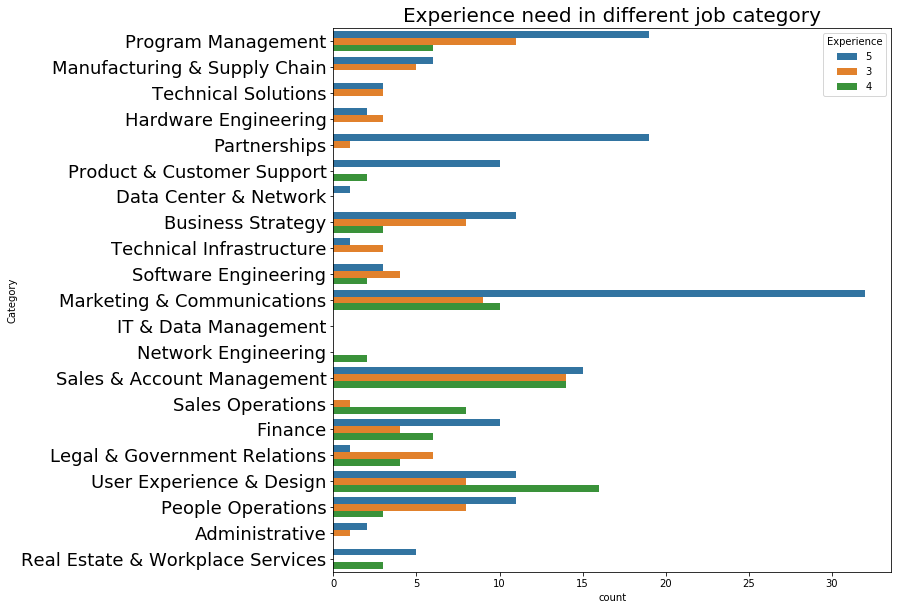

In [20]:
plt.figure(figsize=(10,10))
plt.title('Experience need in different job category',fontsize=20)
sns.countplot(y='Category', hue='Experience', data=dff, hue_order=dff.Experience.value_counts().iloc[:3].index)
plt.yticks(fontsize=18)
plt.show()

1. In marketing field Google wants more experience to compare to other categories.
2. In software development category Google wants highest 3 years of experiences.

# Which location does Google need more employee?

In [21]:
#where is more job located
threshold = 10
location_value_counts=data.Location.value_counts()

to_remove=location_value_counts[location_value_counts <= threshold].index

data['Location'].replace(to_remove,np.nan, inplace=True)

location_value_counts = data.Location.value_counts()

location_value_counts = location_value_counts[::-1]


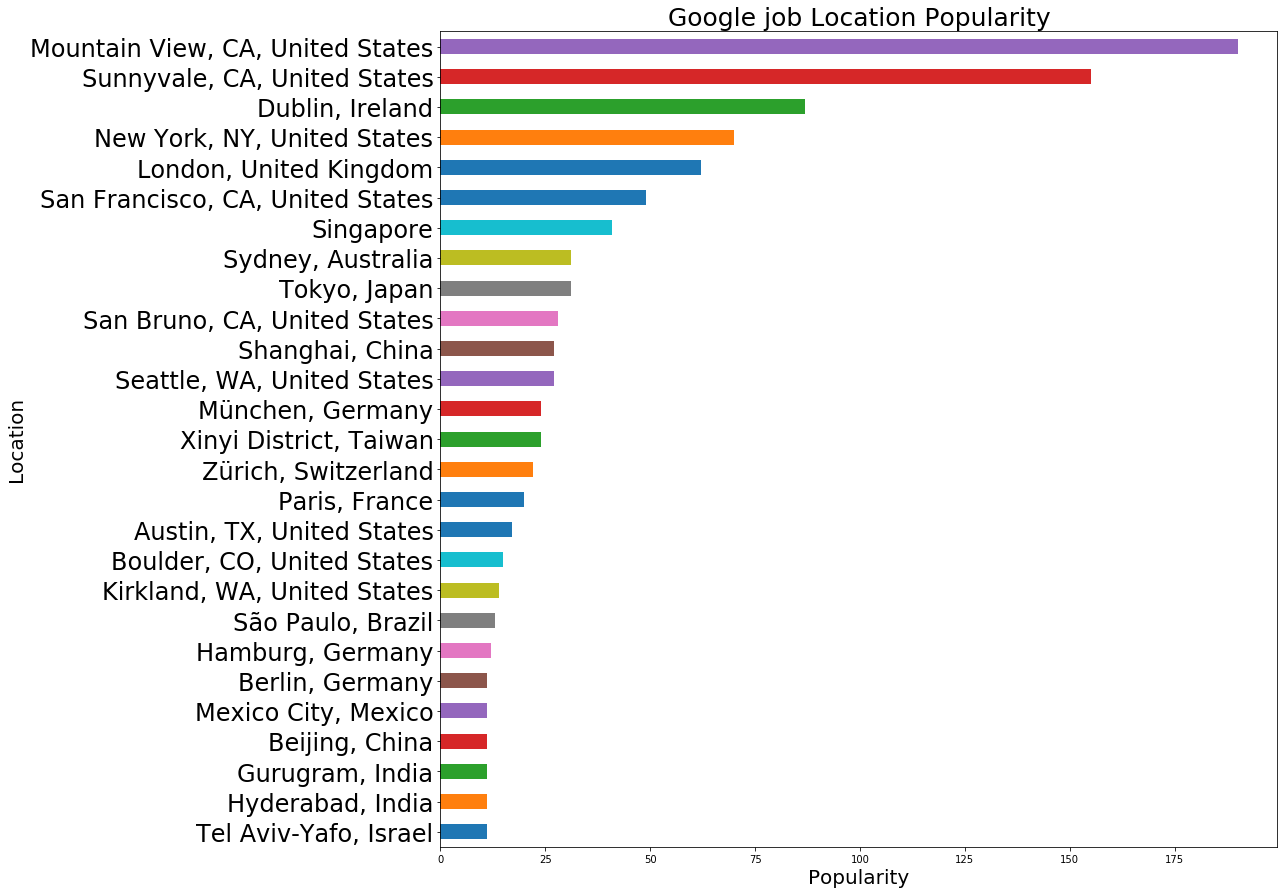

In [22]:
location_value_counts.plot.barh(figsize=(15,15))
#add suptitle
plt.title("Google job Location Popularity",fontsize=25)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
# change xticks fontsize to 14
plt.yticks(fontsize=24)
# finally show the plot
plt.show()

its look like most Google job at United state,ireland

# Which job categories have more jobs?

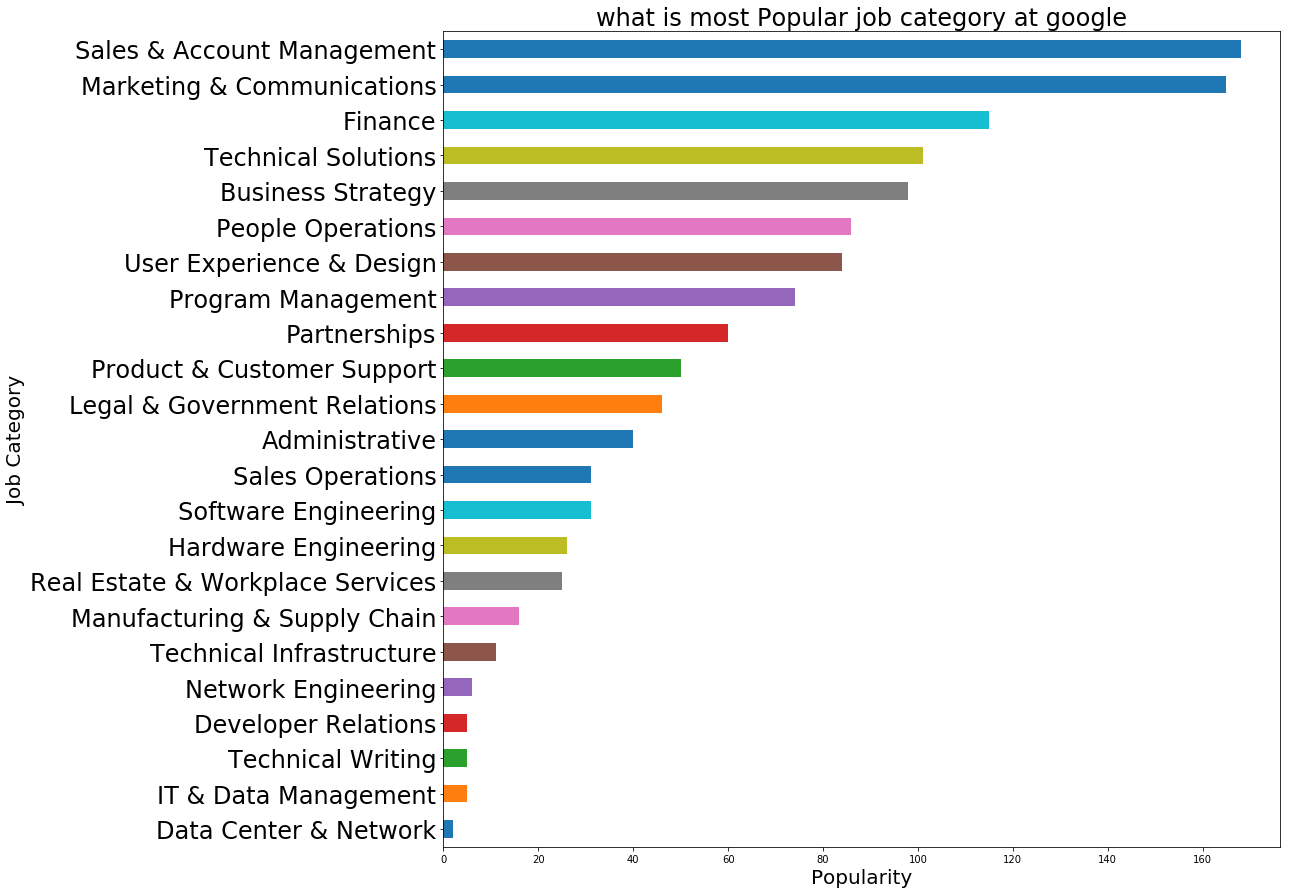

In [23]:
category_value_counts = data.Category.value_counts()

category_value_counts=category_value_counts[::-1]

category_value_counts.plot.barh(figsize=(15,15))

#add Suptitle
plt.title("what is most Popular job category at google",fontsize=24)

#set x labale to
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Job Category",fontsize=20)
# change xticks fontsize to 14
plt.yticks(fontsize=24)
# finally show the plot
plt.show()



Its looks like Sales and Account Management and Markating category have more jobs compare to other

# Let's find out in which category Google has most open jobs in different locations

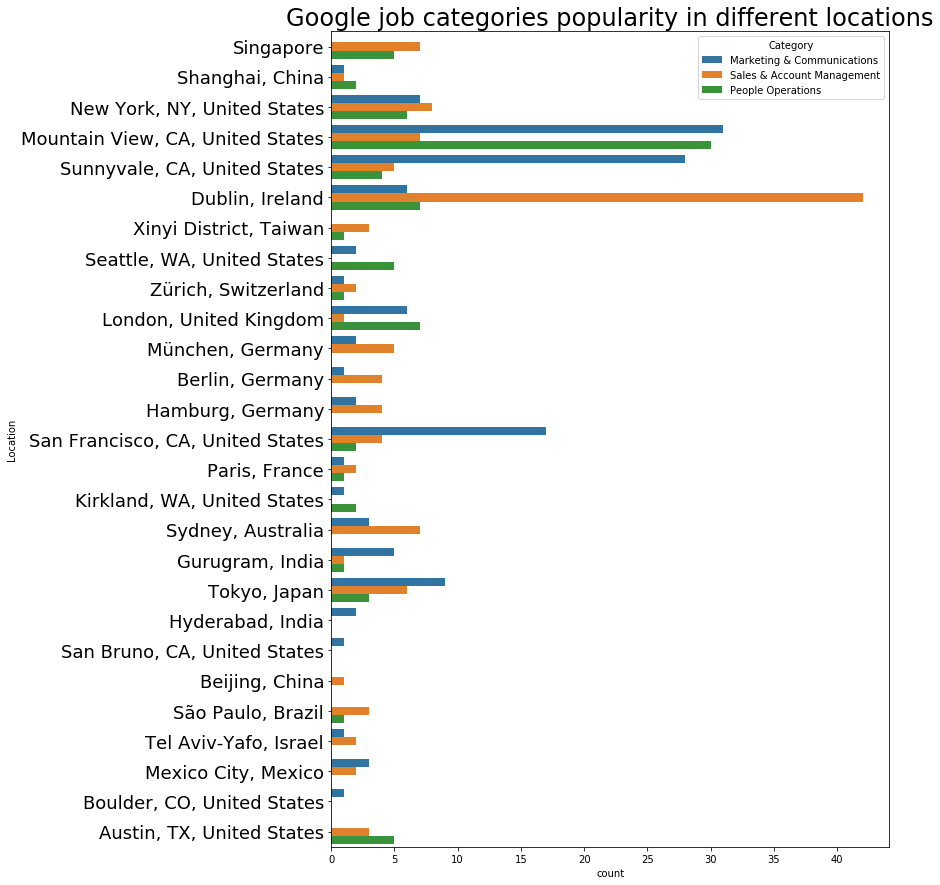

In [24]:
plt.figure(figsize=(10,15))
plt.title('Google job categories popularity in different locations', fontsize=24)
sns.countplot(y='Location', hue='Category', data=data, hue_order=dff.Category.value_counts().iloc[:3].index)
plt.yticks(fontsize=18)
plt.show()

It shows that in United States Google need more employee in marketing and communications field.¶